https://ysyblog.tistory.com/68?category=1144778

https://harryp.tistory.com/871

![](image/1.png)

![](image/2.png)![](image/3.png)![](image/4.png)![](image/5.png)![](image/6.png)

### 분류분석
* 의사결정 나무
  * from sklearn.tree import DecisionTreeClassifier
* 배깅
  * 랜덤 포레스트
  * from sklearn.ensemble import RandomForestClassifier
* 부스팅
* SVM
  * from sklearn.svm import SVC, LinearSVC # svc의 c는 classification을 뜻함
* KNN
  * from sklearn.neighbors import KNeighborsClassifier
* 나이브 베이즈
  * from sklearn.naive_bayes import GaussianNB
* SGD
  * from sklearn.linear_model import SGDClassifier
* 로지스틱 회귀
  * from sklearn.linear_model import LogisticRegression

### 의사결정나무

* 용어
  * Root Node : 시작 node
  * Decision Node (Intermediate Node): 중간 node
  * Leaf Node(Terminal Node) : 마지막 단계의 노드로 최종결과를 가진다.
* 과대적합(Overfitting) 문제
  * 모든 데이터셋이 모두 잘 분류 되어 불순도가 0이 될때 까지 분기해 나간다.
  * Root에서 부터 하위 노드가 많이 만들어 질 수록 모델이 복잡해져 과대적합이 발생할 수 있다.
  * 과대적합을 막기 위해서는 적당한 시점에 하위노드가 더이상 생성되지 않도록 해야 한다.
  * 가지치기(Pruning)라고 한다.
  

* max_depth: 트리의 최대 깊이(질문수)
* max_leaf_nodes: Leaf node 의 최대 개수를 제한
* min_samples_leaf: leaf 노드가 되기 위한 sample 수 제한
* min_samples_split: 나누는 최소 샘플 수

* 독립 변수의 조건에 따라 종속 변수를 분리
  * 머신러닝의 몇안되는 White box 모델
* 결과에 대한 해석이 가능하다.
* 과적합(Overfitting)이 잘 일어나는 단점이 있다.
* 랜덤 포레스트(Random Forest), Gradient Boosting, Adaptive boosting과 같은 Boosting 계열 앙상블이 결정트리를 기반으로 하고 있다

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


* 문제 정의
  * 내가 발견한 Iris 꽃받침(Sepal)의 길이(length)와 폭(width)이 각각 5cm, 3.5cm이고 꽃의 꽃잎(Petal)의 길이와 폭은 각각 1.4cm, 0.25cm이 이었다. 이 꽃는 Iris의 무슨 종일까?

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(iris.data,#input data(feature)
                 iris.target, #output data(label)
                 test_size=0.2, #테스트 셋의 비율(전체중 20%, 기본:0.25)
                 stratify = iris.target, #각 class들을 같은 비율로 나눈다.
                 random_state=1 #random 시드값
                )

X_train.shape, X_test.shape, y_train.shape, y_test.shape
#==> ((120, 4), (30, 4), (120,), (30,))
type(X_train), type(y_train)
#==> (numpy.ndarray, numpy.ndarray)

(numpy.ndarray, numpy.ndarray)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

In [6]:
from sklearn.metrics import accuracy_score
# 훈련데이터셋으로 예측
pred_train = dt.predict(X_train)
# 테스트 데이터셋으로 예측
pred_test = dt.predict(X_test)

acc_train = accuracy_score(pred_train, y_train)
acc_test = accuracy_score(pred_test, y_test)

print(f"훈련데이터셋 정확도: {acc_train}, 테스트데이터셋 정확도:{acc_test}")
#==> 훈련데이터셋 정확도: 1.0, 테스스데이터셋 정확도:0.9666666666666667

훈련데이터셋 정확도: 1.0, 테스트데이터셋 정확도:1.0


In [9]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, pred_train) #실제값, 예측값
cm_test = confusion_matrix(y_test, pred_test)

print(cm_train)
print(cm_test)

# axis=0: 실제, axis=1: 예측

[[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### 의사결정나무 시각화

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
eg = export_graphviz(dt, 
                     out_file=None, 
                     feature_names = X.columns,
                     class_names = ['White','Red'],
                     rounded=True, filled=True)
graph = Source(eg)
graph

#### 피쳐 중요도 시각화

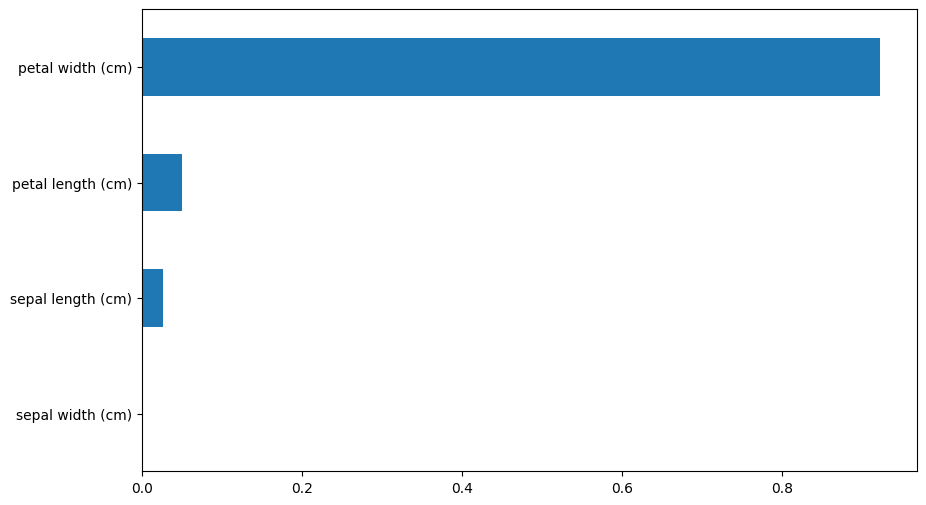

In [18]:
f_i = pd.Series(dt.feature_importances_, index=iris_df.columns[:-1])

import matplotlib.pyplot as plt
f_i.sort_values().plot(kind='barh', figsize=(10,6))
plt.show()

### Random Forest

* 다수의 결정트리를 사용해서 성능을 올린 앙상블 알고리즘의 하나
  * 학습데이터를 샘플링해서 다수의 결정트리를 생성하고 이를 기반으로 다수결로 결과를 결정하는 방식
  * 다수의 결정트리를 만드는데서 랜덤포레스트라고 부른다.
* 처리속도가 빠르며 분류 성능도 높은 모델로 알려져 있다.
* 랜덤 포레스트는 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않는다. 이런 데이터에는 선형 모델이 더 적합하다. 
* 랜덤 포레스트는 선형 모델보다 많은 메모리를 사용하며 훈련과 예측이 느리다. 속도와 메모리 사용에 제약이 있는 애플리케이션이라면 선형 모델이 적합할 수 있다.
* 결정 트리의 주요 단점은 훈련 데이터에 과대적합되는 경향이 있다는 것이다. 랜덤 포레스트는 이 문제를 회피할 수 있는 방법이다
* 아무런 매개변수 튜닝 없이도 선형 모델이나 단일 결정 트리보다 높은 정확도를 낸다 랜덤 포레스트는 하이퍼 파라미터 조정 없이 기본 설정으로도 좋은 결과를 만들어줄 때가 많다.
  
* 랜덤포레스트의 절차
  * 결정트리의 개수를 하이퍼파라미터로 받는다.
  * 랜덤 포레스트를 구성하는 모든 결정트리가 서로 다르도록 만든다.
    * 각 트리는 부트스트랩 샘플링(중복을 허용하면서 랜덤하게 샘플링하는 방식)으로 데이터셋을 준비한다. (총데이터의 수는 원래 데이터셋과 동일 하지만 일부는 누락되고 일부는 중복된다.)
    * 각 트리는 전체 피처중 일부의 피처만 랜덤하게 가지게 된다.
* 각 트리별로 예측결과를 내고 분류의 경우 그 예측을 모아 다수결 투표로 클래스 결과를 낸다.
* 회귀의 경우는 예측 결과의 평균을 낸다.

* 주요 하이퍼파라미터
  * n_estimators
    * tree의 개수
    * 시간과 메모리가 허용하는 범위에서 클수록 좋다.
  * max_features
    * 각 트리에서 선택할 feature의 개수
    * 클수록 각 트리간의 feature 차이가 없어지고 작을 수록 차이가 많이 나게 된다.
  * max_depth, min_samples_leaf, ..
    * DecisionTreeClassifier의 하이퍼파라미터들
    * 트리의 최대 깊이, 가지를 치기 위한 최소 샘플 수 등 결정 트리에서 과적합을 막기 위한 파라미터들을 랜덤 포레스트에 적용할 수 있다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### KNN
* K-NN은 이해하기 쉬운 모델이며 튜닝할 하이퍼파라미터의 수가 적어 빠르게 만들 수있다.
* 많이 조정하지 않아도 자주 좋은 성능을 발휘한다.
* K-NN은 서비스할 모델을 구현할때 보다는 복잡한 알고리즘을 적용해 보기 전에 확인용 또는 base line을 잡기 위한 모델로 사용한다.
* 훈련세트가 너무 큰 경우(Feature나 관측치의 개수가 많은 경우) 거리를 계산하는 양이 늘어나 예측이 느려진다.
* Feature간의 값의 단위가 다르면 작은 단위의 Feature에 영향을 많이 받게 되므로 전처리로 Scaling작업이 필요하다.
* Feature가 너무 많은 경우와 대부분의 값이 0으로 구성된(희소-sparse) 데이터셋에서 성능이 아주 나쁘다

### SVM
support vector간의 가장 넓은 margin을 가지는 초평면(결정경계)를 찾는 것이 SVM의 목표

* Support Vector: 경계를 찾아내는데 기준이 되는 데이터포인트. 초평면(결정경계)에 가장 가까이 있는 vector(데이터포인트)를 말한다.
* margin : 두 support vector간의 너비
* margin이 넓은 결정경계를 만드는 함수를 찾는 것.


**Hard Margin, Soft Margin**
* Overfitting(과적합)을 방지하기 위해 어느정도 오차를 허용하는 방식을 Soft margin이라고 한다. 반대로 오차를 허용하지 않는 방식을 Hard Margin이라고 한다.
* 하이퍼파마미터인 C 조정해 마진을 변경한다.
* 기본값 1
  * 파라미터값을 크게주면 마진폭이 좁아져 마진 오류가 작아지나 Overfitting이 일어날 가능성이 크다.
  * 파라미터값을 작게 주면 마진폭이 넓어져 마진 오류가 크다. 훈련데이터에서는 성능이 안좋아지나 일반화(generalization)되어 테스트 데이터의 성능이 올라간다. 그러나 underfitting 이 날 가능성이 있다.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC, LinearSVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test =\
train_test_split(cancer.data, cancer.target, stratify=cancer.target)


# Scaling
# scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='linear') #선형 SVM # C_list = [0.01, 0.05, 0.1, 0.5, 1, 10]
# svm = LinearSVC()
svm.fit(X_train_scaled, y_train)
pred_train = svm.predict(X_train_scaled)
pred_test = svm.predict(X_test_scaled)

pred_test = svm.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
print("train정확도:", accuracy_score(y_train, pred_train))
print('test정확도:', accuracy_score(y_test, pred_test))
#train정확도: 0.9929577464788732

#### 비선형 데이터 셋에 SVM 적용

* 방사기저(radial base function-RBF) 함수
  * 커널 서포트 벡터 머신의 기본 커널 함수
  * 기준점들이 되는 위치를 지정하고 각 샘플이 그 기준점들과 얼마나 떨어졌는 지를 계산한다. => 유사도(거리)
  * 기준점 별 유사도 계산한 값은 원래 값보다 차원이 커지고 선형적으로 구분될 가능성이 커진다.
  * rbf(radial basis function) 하이퍼파라미터
    * C
      * 오차 허용기준. 작은 값일 수록 많이 허용한다.
      * 과적합일 경우 값을 감소시키고, 과소적합일 경우 값을 증가 시킨다.
    * gamma
      * 방사기저함수의 gamma로 규제의 역할을 한다.
      * 모델이 과대적합일 경우 값을 감소시키고, 과소적합일 경우 값을 증가시킨다.  
      * gamma 방사 기저함수 공식상 감마가 크면 반환값은 작아지고 감마가 작으면 반환값은 커진다. (gamma를 곱하므로)
      * 감마가 작을 수록 값들의 거리가 멀어지고(큰값이 결과로 나오므로) 클 수록 거리가 가까워진다. 그래서 gamma 가 크면 거리가 타이트해져 과적합이 일어날 수있다. (공간의 여유가 없므으로)


In [ ]:
from sklearn.svm import SVC

rbf_model = SVC(kernel='rbf',  random_state=12, 
                gamma='auto', probability=True)  #auto: 1/컬럼수, scale: 1/(컬럼수*X분산값)
rbf_model.fit(X_train_scaled, y_train)

### Logistic Reression

* 선형회귀 알고리즘을 이용한 이진 분류 모델
* Sample이 특정 클래스에 속할 확률을 추정한다.
* 로그 손실함수는 최소값을 찾는 정규방적식이 없기 때문에 LogisticRegression은 경사하강법을 이용해 최적화를 진행한다.
* 주요 하이퍼 파라미터
  * penalty: 과적합을 줄이기 위한 규제방식
    * 'l1', 'l2'(기본값), 'elasticnet', 'none'
  * C: 규제강도(기본값 1) - 작을 수록 규제가 강하다.
  * max_iter(기본값 100) : 경사하강법 반복횟수

In [ ]:
from sklearn.linear_model import LogisticRegression

# 선형 기반이기 때문에 Scaling 필요

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Naive Bayes

* 스팸메일에서와 같이 특정 단어가 있다/없다 처럼 이진 속성을 가지고 속성이 아주 많은 경우에는 BernoulliNB 를 주로 적용한다.
* 이진 속성이 아닌 일반적인 연속값 속성을 가지는 데이터에는 GaussianNB 를 적용한다.
* 스팸메일과 같은 경우에도, 나이브베이즈는 로지스틱회귀 보다 일반적으로 성능이 떨어지므로 잘 사용되지 않는 경향이다.

In [20]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

### Gradient Boosting

**Boosting**
* 부스팅(Boosting)이란 단순하고 약한 학습기(Weak Learner)들를 결합해서 보다 정확하고 강력한 학습기(Strong Learner)를 만드는 방식.
* 정확도가 낮은 하나의 모델을 만들어 학습 시킨뒤, 그 모델의 예측 오류는 두 번째 모델이 보완한다. 이 두 모델을 합치면 처음보다는 정확한 모델이 만들어 진다. 합쳐진 모델의 예측 오류는 다음 모델에서 보완하여 계속 더하는 과정을 반복한다.
* 약한 학습기들은 앞 학습기가 만든 오류를 줄이는 방향으로 학습한다.

**Gradient Boosting**
* 처음 모델은 y를 예측 두번째 부터는 앞 모델이 만든 오류를 예측하고 그것을 앞 모델에 업데이트하면 오류를 줄일 수 있다.
* 그 오류를 update할 때 뺄까 더할까를 gradient descent 방법을 쓴다. 미분해서 나오는 값의 음수를 취해서 적용.
* 학습률을 작게하면 update가 조금씩 크면 많이 하게 된다. 그래서 크게하면 학습데이터에 너무 맞아 과대적합 될 수 있다.
* 개별 모델로 Decision Tree 를 사용한다.
* depth가 깊지 않은 트리를 많이 연결해서 이전 트리의 오차를 보정해 나가는 방식으로 실행한다.
* 오차를 보정할 때 경사하강법(Gradient descent)을 사용한다.
* 얕은 트리를 많이 연결하여 각각의 트리가 데이터의 일부에 대해 예측을 잘 수행하도록 하고 그런 트리들이 모여 전체 성능을 높이는 것이 기본 아이디어.
* 분류와 회귀 둘다 지원하는 모델 (GradientBoostingClassifier, GrandientBoostingRegressor)
* 훈련시간이 많이 걸리고, 트리기반 모델의 특성상 희소한 고차원 데이터에서는 성능이 않좋은 단점이 있다.

**주요 파라미터**

* Decision Tree 의 가지치기 관련 매개변수
  * 각각의 tree가 복잡한 모델이 되지 않도록 한다.
* learning rate
  * 이전 tree의 오차를 얼마나 강하게 보정할 것인지 제어하는 값.
  * 값이 크면 보정을 강하게 하여 복잡한 모델을 만든다. 학습데이터의 정확도는 올라가지만 과대적합이 날 수있다.
  * 값을 작게 잡으면 보정을 약하게 하여 모델의 복잡도를 줄인다. 과대적합을 줄일 수 있지만 성능 자체가 낮아질 수있다.
  * 기본값 : 0.1
* n_estimators
  * tree의 개수 지정. 많을 수록 복잡한 모델이 된다.
* n_iter_no_change, validation_fraction
  * validation_fraction에 지정한 비율만큼 n_iter_no_change에 지정한 반복 횟수동안 검증점수가 좋아 지지 않으면 훈련을 조기 종료한다.
* 보통 max_depth를 낮춰 개별 트리의 복잡도를 낮춘다. (5가 넘지 않게) 그리고 n_estimators를 가용시간, 메모리 한도에 맞춘뒤 적절한 learning_rate을 찾는다.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(learning_rate=0.01)
gb_clf.fit(X_train, y_train)
#==> GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                        #    learning_rate=0.01, loss='deviance', max_depth=3,
                        #    max_features=None, max_leaf_nodes=None,
                        #    min_impurity_decrease=0.0, min_impurity_split=None,
                        #    min_samples_leaf=1, min_samples_split=2,
                        #    min_weight_fraction_leaf=0.0, n_estimators=100,
                        #    n_iter_no_change=None, presort='deprecated',
                        #    random_state=None, subsample=1.0, tol=0.0001,
                        #    validation_fraction=0.1, verbose=0,
                        #    warm_start=False)

pred_train = gb_clf.predict(X_train)
pred_test = gb_clf.predict(X_test)

### XGboost

* Gradient Boost 알고리즘을 기반으로 개선해서 나온 모델.
* 캐글 경진대회에서 상위에 입상한 데이터 과학자들이 사용한 것을 알려저 유명해짐.
* Gradient Boost의 단점인 느린수행시간을 해결하고 과적합을 제어할 수 있는 규제를 제공하여 성능을 높임.

* 주요 매개변수
  * learning_rate : 학습률, 보통 0.01 ~ 0.2 사이의 값 사용
  * n_estimators : week tree 개수
  * max_depth: 트리의 depth 지정.
  * min_child_weight : 값이 높아지면 under-fitting 됨, CV를 통해 튜닝되어야 한다.
  * booster='gbtree' : 트리,회귀(gblinear) 트리가 기본값, 좋은 성능을 내기 때문에 수정할 필요없음
  * silent=True : 모델이 적합되는 과정을 이해하기위해선 False으로한다
  * colsample_bytree=0.8 : 트리를 생성할때 훈련 데이터에서 변수를 샘플링해주는 비율. 보통0.6~0.9
  * colsample_bylevel=0.9 : 트리의 레벨별로 훈련 데이터의 변수를 샘플링해주는 비율. 보통0.6~0.9
  * gamma =0 : 노드가 split 되기 위한 loss function의 값이 감소하는 최소값을 정의한다. gamma 값이 높아질 수록 알고리즘은 보수적으로 변하고, loss function의 정의 에 따라 적정값이 달라지기때문에 반드시 튜닝해야한다.

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=200,
                        learning_rate=0.2,
                        max_depth=1)
xgb_clf.fit(X_train, y_train)
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#               importance_type='gain', interaction_constraints='',
#               learning_rate=0.2, max_delta_step=0, max_depth=1,
#               min_child_weight=1, missing=nan, monotone_constraints='()',
#               n_estimators=200, n_jobs=0, num_parallel_tree=1,
#               objective='binary:logistic', random_state=0, reg_alpha=0,
#               reg_lambda=1, scale_pos_weight=1, subsample=1,
#               tree_method='exact', validate_parameters=1, verbosity=None)

pred_train = xgb_clf.predict(X_train)
pred_test = xgb_clf.predict(X_test)

### LGBM

https://greatjoy.tistory.com/72

https://greeksharifa.github.io/machine_learning/2019/12/09/Light-GBM/

* Light GBM은 트리 기반의 학습 알고리즘인 gradient boosting 방식의 프레임 워크이다.
* Light GBM은 나무를 수직으로 확장한다. 반면 다른 알고리즘은 나무를 수평으로 확장한다. 
* 따라서 기존의 알고리즘은 수평으로 확장하여 포화 트리를 만드는 방향으로 학습하는 반면 leaf-wise tree growth인 LGBM은 최대 delta loss가 증가하도록 잎의 개수를 정한다. 
* leaf-wise알고리즘은 다른 level-wise 알고리즘보다 낮은 loss를 달성하는 경향이 있다. 데이터의 크기가 작은 경우 leaf-wise는 과적합(overfitting)되기 쉬우므로 max_depth를 줄여줘야 한다.

**주요 파라미터**

1. learning_rate

   * 일반적으로 0.01 ~ 0.1 정도로 맞추고 다른 파라미터를 튜닝한다. 나중에 성능을 더 높일 때 learning rate를 더 줄인다.

2. num_iterations

   * 기본값이 100인데 1000정도는 해주는게 좋다. 너무 크게하면 과적합이 발생할 수 있다.

   * 같은 뜻으로 사용되는 옵션: num_iteration, n_iter, num_tree, num_trees, num_round, num_rounds, num_boost_round, n_estimators

3. max_depth

   * -1로 설정하면 제한없이 분기한다. feature가 많다면 크게 설정한다. 파라미터 설정 시 우선적으로 설정한다.

4. boosting 

   * 부스팅 방법: 기본값은 gbdt이며 정확도가 중요할때는 딥러닝의 드랍아웃과 같은 dart를 사용한다. 샘플링을 이용하는 goss도 있다.

5. bagging_fraction

   * 배깅을 하기위해서 데이터를 랜덤 샘플링하여 학습에 사용한다. 비율은 0 < fraction <= 1 이며 0이 되지 않게 해야한다.

6. feature_fraction

   * feature_fraction이 1보다 작다면 LGBM은 매 iteration(tree)마다 다른 feature를 랜덤하게 추출하여 학습하게된다. 만약, 0.8로 값을 설정하면 매 tree를 구성할 때, feature의 80%만 랜덤하게 선택한다. 과적합을 방지하기 위해 사용할 수 있으며 학습 속도가 향상된다.

7. scale_pos_weight

   * 클래스 불균형의 데이터 셋에서 weight를 주는 방식으로 positive를 증가시킨다. 기본값은 1이며 불균형의 정도에 따라 조절한다.

8. early_stopping_round

   * Validation 셋에서 평가지표가 더 이상 향상되지 않으면 학습을 정지한다. 평가지표의 향상이 n round 이상 지속되면 학습을 정지한다.

9. lambda_l1, lambda_l2

   * 정규화를 통해 과적합을 방지할 수 있지만, 정확도를 저하시킬수도 있기 때문에 일반적으로 default 값인 0으로 둔다.

* 더 빠른 속도
  * bagging_fraction
  * max_bin은 작게
  * save_binary를 쓰면 데이터 로딩속도가 빨라짐
  * parallel learning 사용
* 더 높은 정확도
  * max_bin을 크게
  * num_iterations 는 크게하고 learning_rate는 작게
  * num_leaves를 크게(과적합의 원인이 될 수 있음)
  * boosting 알고리즘 'dart' 사용
* 과적합을 줄이기
  * max_bin을 작게
  * num_leaves를 작게
  * min_data_in_leaf와 min_sum_hessian_in_leaf 사용하기

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=200)

params = {'max_depth': [10, 15, 20],
          'min_child_samples': [20, 40, 60],
          'subsample': [0.8, 1]}

grid = GridSearchCV(lgbm, param_grid=params)
grid.fit(X_train, Y_train, early_stopping_rounds=100, eval_metric='auc',
         eval_set=[(X_train, Y_train), (X_val, Y_val)])

print("최적 파라미터: ", grid.best_params_)
lgbm_roc_score = roc_auc_score(Y_test, grid.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC: {0:.4f}".format(lgbm_roc_score))

# 위 결과를 적용하여 재학습
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=50, subsample=0.8,
                      min_child_samples=60, max_depth=20)

evals = [(X_test, Y_test)]
lgbm.fit(X_train, Y_train, early_stopping_rounds=100, eval_metric='auc',
         eval_set=evals, verbose=True)

score = roc_auc_score(Y_test, grid.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC: {0:.4f}".format(score))

### 분류 평가지표

1. 정확도 (Accuracy)
   * 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
   * accuracy_score(모델예측값, 정답)
   * 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.
     * 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.
   
2. 정밀도 (Precision)

   * 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
   * TPR(True Positive Rate) 이라고도 한다.
   * ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
   
3. 재현률 (Recall)

  * Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
  * PPV(Positive Predictive Value) 라고도 한다.
  * ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율
   
4. F1점수 (F1 Score)
   * 정밀도와 재현율의 조화평균 점수
  
5. AUC
   * FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
   * ROC 곡선 아래쪽 면적
   * 0 ~ 1 사이 실수로 나오며 클수록 좋다.
   * AUC 점수기준
     * 1.0 ~ 0.9 : 아주 좋음
     * 0.9 ~ 0.8 : 좋음
     * 0.8 ~ 0.7 : 괜찮은 모델
     * 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
     * 0.6 ~ 0.5 : 좋지 않은 모델

* 재현율이 더 중요한 경우
  * 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
  * FN(False Negative)를 낮추는데 촛점을 맞춘다.
  * 암환자 판정 모델, 보험사기적발 모델
* 정밀도가 더 중요한 경우
  * 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
  * FP(False Positive)를 낮추는데 초점을 맞춘다.
  * 스팸메일 판정

![](confusion%20matrix1.png)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, roc_curve, roc_auc_score
y_test = [1,2,3,4]
y_pred = [2,3,2,1]

accuracy_score(y_test, y_pred)

recall_score(y_test, y_pred)

precision_score(y_test, y_pred)

f1_score(y_test, y_pred)

classification_report(y_test, y_pred)
#클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

y_pred = model.predict_proba(X_test)[:, 1]

fprs1, tprs1, thresholds1 = roc_curve(y_test, y_pred)

plt.figure(figsize=(7,7))
plt.plot(fprs1, tprs1, label='Tree-Roc곡선')
plt.legend()
plt.grid(True)
plt.title('ROC Curve')
plt.show()

roc_auc_score(y_test, y_pred) # auc score

### KFold 교차검증

https://ysyblog.tistory.com/69?category=1144778

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
acc_train_list = [] # 평가지표들을 저장할 리스트
acc_test_list = []

for train_index, test_index in kfold.split(X):
    # index를 이용해 훈련/검증 데이터셋 추출
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    # 모델생성
    tree = DecisionTreeClassifier()
    # 학습
    tree.fit(X_train, y_train)
    # 검증
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)

    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)

acc_test_list, np.mean(acc_test_list)

* 원 데이터셋의 row 순서대로 분할하기 때문에 불균형 문제가 발생할 수 있다.

### Stratified KFold

* 나뉜 fold 들에 label들이 같은(또는 거의 같은) 비율로 구성 되도록 나눈다.

In [ ]:
from sklearn.model_selection import StratifiedKFold

s_fold = StratifiedKFold(n_splits=3)

for train_index, test_index in s_fold.split(X, y):

# 다음부터는 위의 Kfold와 같이 진행

### Cross validation

* Kfold와 차이점은 그냥 점수만 계산해준다는 것인듯...

In [ ]:
from sklearn.model_selection import cross_val_score
tree = DecisionTreeClassifier()

score_list = cross_val_score(tree, X, y, scoring='accuracy', cv=3)

score_list
#==> array([0.98, 0.94, 0.98])
np.mean(score_list)

### 하이퍼파라미터 튜닝

#### 그리드 서치

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
param_grid = {
    'max_depth':[4,5,6,7],
    'max_leaf_nodes':[3,5,7,9,10],
    'criterion':['entropy'] #기본값 말고 다른값을 사용할 경우.
}

gs = GridSearchCV(dt, 
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv = 3,
                  n_jobs=-1)
gs.fit(X_train, y_train)

gs.best_parrams_ # 가장 좋은 성능을 보여준 파라미터
gs.best_estimator_ # 가장 좋은 성능을 보인 모델
gs.best_score_ # 가장 좋은 점수

#### 랜덤 서치

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

dt = DecisionTreeClassifier()
param = {
    'max_depth':range(1, 21),
    'max_leaf_nodes':range(5, 101, 5),
    'criterion':['entropy','gini']
}
# 800
n_iter = 80 #기본 :10

rs = RandomizedSearchCV(dt,
                        param_distributions=param,
                        n_iter=n_iter, 
                        cv=5, 
                        n_jobs=-1)

rs.fit(X_train, y_train)

### 앙상블

**Voting의 유형**
* hard voting
  * 다수의 추정기가 결정한 예측값들 중 많은 것을 선택하는 방식

* soft voting
  * 다수의 추정기에서 각 레이블별 예측한 확률들의 평균을 내서 높은 레이블값을 결과값으로 선택하는 방식
  * 일반적으로 soft voting이 성능이 더 좋다.
  * Voting은 성향이 다르면서 비슷한 성능을 가진 모델들을 묶었을때 가장 좋은 성능을 낸다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=5)
svm = SVC(C=0.1, gamma='auto', probability=True) #SVC 모델을 soft voting에 사용하려면 probability=True 로 설정해야 한다.
lg = LogisticRegression()

estimators = [('knn',knn), ('dt',dt), ('svm',svm), ('lg', lg)]

from sklearn.ensemble import VotingClassifier
v_clf = VotingClassifier(estimators) #voting="hard"-기본값 || voting="soft"

v_clf.fit(X_train, y_train) #각각의 모델을 학습

pred_test = v_clf.predict(X_test)

accuracy_score(y_test, pred_test)

#### Grid Search를 이용한 Voting

In [ ]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()
gs_dt = GridSearchCV(dt, param_grid= {'max_depth':range(1,10)}, cv=5, n_jobs=-1)

svm = SVC(probability=True)
gs_svm = GridSearchCV(svm, param_grid={'C':[0.01,0.1,0.5,1], 'gamma':[0.01,0.1,0.5,1,5]}, cv=5, n_jobs=-1)

estimators2 = [('gs_dt', gs_dt), ('gs_svm', gs_svm)]

v_clf2 = VotingClassifier(estimators2, voting='soft')

v_clf2.fit(X_train, y_train)

pred_test = v_clf2.predict(X_test)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)